<a href="https://colab.research.google.com/github/DeekshithaBethireddy/AI_ML_Internship-Ybi-Foundation-/blob/main/ybi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

Import Data

In [4]:
from sklearn.datasets import load_digits

In [5]:
df = load_digits()

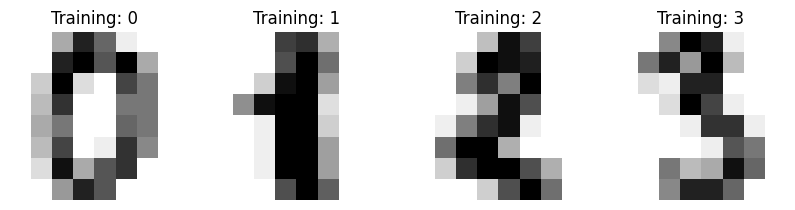

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

Data Preprocessing

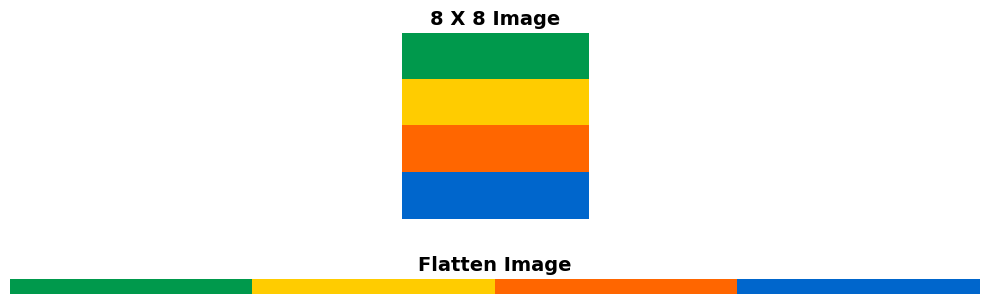

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Create a conceptual 8x8 image with 4 colored bands (2 rows each)
image = np.zeros((8, 8, 3), dtype=np.uint8)

# Define color bands (RGB)
colors = {
    'green': [0, 153, 76],
    'yellow': [255, 204, 0],
    'orange': [255, 102, 0],
    'blue': [0, 102, 204]
}

# Apply colors to bands
image[0:2] = colors['green']     # Top 2 rows
image[2:4] = colors['yellow']
image[4:6] = colors['orange']
image[6:8] = colors['blue']      # Bottom 2 rows

# Flattened image (reshape to 1x64, keeping the RGB color)
flattened_image = image.reshape(-1, 1, 3).transpose(1, 0, 2)  # shape: (1, 64, 3)

# Plotting
plt.figure(figsize=(10, 4))

# Original 8x8 Image
plt.subplot(2, 1, 1)
plt.imshow(image)
plt.title('8 X 8 Image', fontsize=14, weight='bold')
plt.axis('off')

# Flattened Image
plt.subplot(2, 1, 2)
plt.imshow(flattened_image)
plt.title('Flatten Image', fontsize=14, weight='bold')
plt.axis('off')

plt.tight_layout()
plt.show()


In [39]:
df.images.shape

(1797, 8, 8)

In [40]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [41]:
df.images[0].shape

(8, 8)

In [42]:
len(df.images)

1797

In [43]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [44]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [45]:
data[0].shape

(64,)

In [46]:
data.shape

(1797, 64)

Scaling Image Data

In [47]:
data.min()

np.float64(0.0)

In [48]:
data.max()

np.float64(16.0)

In [49]:
data = data/16

In [50]:
data.min()

np.float64(0.0)

In [51]:
data.max()

np.float64(1.0)

In [52]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

Train Test Split Data

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

Random Forest Model

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier()

In [58]:
rf.fit(X_train, y_train)

RandomForestClassifier()

Predict Test Data

In [59]:
y_pred = rf.predict(X_test)

In [60]:
y_pred

array([2, 0, 4, 9, 3, 0, 4, 1, 0, 3, 4, 9, 6, 6, 9, 0, 1, 7, 3, 8, 3, 9,
       9, 1, 8, 4, 2, 6, 3, 0, 1, 4, 4, 0, 6, 0, 3, 6, 0, 5, 1, 5, 7, 1,
       3, 5, 2, 6, 6, 1, 3, 4, 7, 2, 0, 2, 8, 1, 2, 7, 7, 4, 7, 1, 9, 2,
       1, 3, 9, 1, 7, 9, 8, 6, 5, 4, 7, 3, 4, 9, 4, 1, 9, 5, 8, 7, 6, 3,
       0, 1, 0, 0, 2, 0, 0, 9, 5, 0, 6, 8, 9, 0, 3, 5, 5, 2, 2, 2, 7, 9,
       0, 8, 9, 5, 8, 1, 8, 7, 0, 7, 5, 8, 3, 4, 9, 3, 6, 4, 5, 6, 8, 8,
       2, 2, 1, 5, 4, 0, 4, 9, 6, 5, 5, 2, 6, 5, 7, 8, 2, 1, 2, 7, 8, 5,
       6, 1, 0, 4, 4, 1, 9, 3, 7, 3, 2, 4, 9, 7, 1, 8, 1, 9, 4, 7, 9, 7,
       8, 2, 9, 1, 4, 2, 6, 5, 3, 7, 4, 6, 6, 5, 3, 6, 2, 4, 1, 1, 5, 3,
       5, 9, 5, 3, 0, 0, 0, 0, 0, 4, 6, 2, 5, 4, 8, 5, 0, 3, 9, 3, 2, 8,
       5, 9, 9, 1, 6, 6, 7, 2, 1, 9, 0, 1, 0, 6, 3, 4, 3, 5, 9, 1, 6, 2,
       6, 8, 7, 3, 8, 8, 3, 4, 7, 9, 5, 1, 8, 8, 8, 0, 2, 7, 7, 1, 4, 9,
       2, 0, 1, 0, 8, 1, 9, 3, 9, 3, 7, 3, 9, 9, 9, 9, 1, 1, 4, 4, 5, 2,
       3, 5, 7, 4, 0, 0, 4, 6, 2, 7, 7, 9, 6, 0, 3,

 Model Accuracy

In [61]:
from sklearn.metrics import confusion_matrix, classification_report

In [62]:
confusion_matrix(y_test, y_pred)

array([[51,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 60,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 52,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 52,  1,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  0, 49,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  0],
       [ 0,  3,  2,  0,  0,  0,  0,  0, 48,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 65]])

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.95      1.00      0.97        56
           2       0.96      1.00      0.98        46
           3       0.97      1.00      0.98        60
           4       0.98      1.00      0.99        52
           5       1.00      0.95      0.97        55
           6       0.98      0.96      0.97        51
           7       1.00      1.00      1.00        49
           8       0.98      0.91      0.94        53
           9       0.98      0.98      0.98        66

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

